# Assignment 2: My First Hillclimber
In your last assignment we all got up to speed on setting up our coding environment, working through the logistics of these programming assignments, and trying to get us all on the same page for prerequisite knowledge.  Now it's time to start making the backbone for our assignments (and project) for the rest of this semester, a basic evolutionary algorithm!

Starting with the most basic and vanilla starting point we can, we'll simply be implementing the Hillclimber algorithm we went over in class, and even using the same example of optimizing a bit string for the OneMax problem.  So you should already know what the steps and desired outcome should be -- this is just an excerise in making the code what you want!  Just like real vanilla, this is itself subtlely complex and is the starting point to layer on so many extra topping, bells, and whistles to complement this base -- but for this week we'll try and keep it plain and simple.  

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import random
plt.style.use('seaborn')

Since we already know the pseudocode, that seems like a great place to start.  Borrowing from the Luke textbook (Section 2.1, pg 17), the steps for a basic Hillclimber are as follows:

![Luke_hillclimber_pseudocode.png](Luke_hillclimber_pseudocode.png)

### Q1: Implementation

In the spirit of starting simple, let's also begin with the most barebones implementation of this algorithm.  The pseudocode below followings this proceedure (replacing the current solution, `S`, and its potential replacement, `R`, with the variable names `parent` and `child` as we used in class.  Please fill in the missing code.

*Hint:* note that Python uses pointers, so please keep in mind [the difference between and shallow vs. deep copy](https://medium.com/@thawsitt/assignment-vs-shallow-copy-vs-deep-copy-in-python-f70c2f0ebd86), if approapate for your implementation.  

*Hint:* note also that here we're using [defult parameters](https://www.geeksforgeeks.org/default-arguments-in-python/) to pass in the hyperparameter settings for our evolutionary algorithm.  

In [2]:
def hillclimber(total_generations = 100, bit_string_length = 30, num_elements_to_mutate = 1):

    print('Total Generations: {} \t Bit String Length: {} \t Number of Elements to Mutate: {}'.format(total_generations,bit_string_length,num_elements_to_mutate))
    print()
    record = pd.DataFrame(columns=['Gen', 'Fitness', 'Solution'])
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    
    # the initialization proceedure
    parent = []
    for i in range(bit_string_length):
        parent.append(random.randint(0,1))
    
    for i in range(total_generations): # repeat

        # record keeping
        fitness_parent = sum(parent)
        record.loc[len(record.index)] = [i, fitness_parent, parent]
        
        # the modification procedure
        child = parent.copy()
        mutate_elements = []
        for j in range(num_elements_to_mutate):
            mutate_elements.append(random.randint(0,bit_string_length-1))
        for j in range(len(mutate_elements)):
            bit = child[mutate_elements[j]]
            if bit==1:
                child[mutate_elements[j]] = 0
            else:
                child[mutate_elements[j]] = 1
        
        # the assessement procedure
        fitness_child = sum(child)
        if fitness_child > fitness_parent:
            
            # selection procedure
            parent = child
            
        # check for ideal solution since we know it
#         if fitness_parent == bit_string_length:
#             return parent
        
    return record
        
        
h_record = hillclimber() # call function to run
display(h_record)

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1



,Gen,Fitness,Solution
0,0,13,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, ..."
1,1,13,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, ..."
2,2,14,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, ..."
3,3,14,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, ..."
4,4,15,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, ..."
5,5,16,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, ..."
6,6,17,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, ..."
7,7,18,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, ..."
8,8,18,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, ..."
9,9,19,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, ..."


### Q2: Record Keeping
You've now implemented an evolutionary algorithm... we think.  What happens when you run it?  Not much, eh?  The code block above was to show you how simple the pieces of an evolutionary algorithm could be, but let's add in some record keeping to be able to observe what's going on throughout the process.

*Hint:* Being able to turn this output on and off with a hyperparameter is very helpful when running trials in large batches later on.

Modify the above code block such that you are able to display the generation, candidate solution, and fitness -- similar to this example output:

<img src="terminal_output.png" align="left"/>

Also modify and rerun the code, such that you are able to plot the fitness over generation time, similar to this example plot (not necessarily in exact values of shape, but in the general trend):

*Hint:* Don't be afraid to steal your code (or the solutions) from last assignment to build upon too.

<img src="fitness_over_time.png" align="left"/>

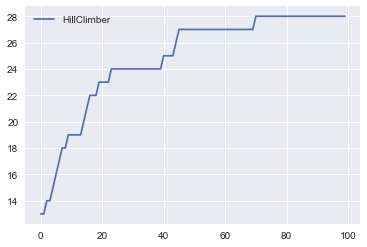

In [3]:
# plot fitness over time
plt.plot(h_record['Fitness'])
plt.xlabel = "generation"
plt.ylabel = "fitness"
plt.legend(["HillClimber"])
plt.show()

### Q3: Repeatable Experiments
In analyzing the effects of differences between different experimental setup and algorithmic variants, one of the things we'll need to do in future assignments is run, analyze, and visualize repeated trials to gain statistical signifance.  Let's take a first step in that direction by leveraging the functional form of our hillcimber setup above to run and plot multiple trials.  

We'll start first with running 10 trials of the same hillclimber as above, and simply overlaying the plots of each into a single figure, something like this: 


<img src="fitness_over_time_multiple_runs.png" align="left"/>

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1

Total Generations: 100 	 Bit String Length: 30 	 Number of Elements to Mutate: 1



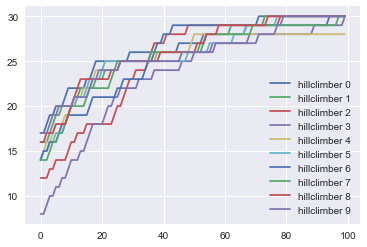

In [5]:
# plot overlayed fitness over time

total_runs = 10
overlays = []
for i in range(total_runs):
    h_record = hillclimber()
    overlays.append(h_record)
    plt.plot(h_record['Fitness'], label='hillclimber {}'.format(i))

plt.xlabel = 'generation'
plt.ylabel = 'fitness'
plt.legend()
plt.show()


The above rainbow of lines looks fun, but will get messy quickly.  Instead for most comparisons we'll plot fitness curves with confidence intervals.  My personal favorite is the bootstrapped confidence interval, as it makes very few assumptions about the distribution of your data.  The downside is that it's much slower than a confidence interval based on standard deviations of a normal distribution.  Please plot a 95% boostrapped confidence interval of fitness over time for 10 runs. 

*Hint:* I like Randy's [tutorial on boostrapped confidence intervals](http://www.randalolson.com/2012/08/06/statistical-analysis-made-easy-in-python/).  Please note that the confidence interval values need to be calcuclated separately for each generation in a time series plot.  

*Hint:* With a small number of runs like this, you're likely to be thrown waning from the boostrapped confidence interval funcation (which works best with a larger amount of repititions/variation).  Feel free to ignore these for now (or even silence warning -- though be cautious in general if surpressing all warnings).

*Hint:* If you're not already familiar with it, you may want to check out the [fill-between and alpha](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-alpha-py) function/argument in matplotlib.  

It may look something like this:

<img src="fitness_over_time_bootstrapped_ci.png" align="left"/>

C:\Users\lucky\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
C:\Users\lucky\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.


[array([11.9, 15.3]), array([11.9, 15.6]), array([12.7, 16.1]), array([13.6, 16.9]), array([13.9, 17.3]), array([14.6, 18. ]), array([14.9, 18.3]), array([15.3, 18.6]), array([15.6, 19. ]), array([16.4, 19.6]), array([17.1, 20.1]), array([17.3, 20.5]), array([17.5, 20.9]), array([18.2, 21.2]), array([18.2, 21.3]), array([18.8, 21.7]), array([19.4, 22.2]), array([20. , 22.6]), array([20.2, 23.1]), array([20.3, 23.2]), array([20.3, 23.3]), array([20.7, 23.8]), array([20.9, 23.8]), array([20.9, 24. ]), array([21.5, 24.1]), array([22.1, 24.3]), array([22.3, 24.7]), array([22.8, 24.8]), array([23.1, 24.7]), array([23.4, 24.9]), array([23.4, 24.9]), array([23.5, 25. ]), array([23.8, 25. ]), array([23.8, 25. ]), array([24., 25.]), array([24.1, 25.1]), array([24.3, 25.4]), array([24.8, 25.8]), array([25. , 26.2]), array([25.1, 26.2]), array([25.2, 26.5]), array([25.3, 26.7]), array([25.2, 26.7]), array([25.3, 27. ]), array([25.3, 27. ]), array([25.3, 27.1]), array([25.7, 27.2]), array([25.7, 2

C:\Users\lucky\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: InstabilityWarning: Some values used extremal samples; results are probably unstable.


TypeError: unsupported operand type(s) for -: 'range' and 'list'

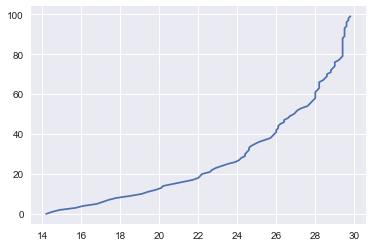

In [26]:
#plot bootstrapped fitness over time

import warnings
# warnings.filterwarnings('ignore') # Danger, Will Robinson! (not a scalable hack, and may surpress other helpful warning other than for ill-conditioned bootstrapped CI distributions)
import scikits.bootstrap as bootstrap

total_generations = 100
array_of_fitness_over_time = []
CIs = []
for i in range(total_runs):
    array_of_fitness_over_time.append(overlays[i]['Fitness'])
    
mean_values = []
for i in range(len(array_of_fitness_over_time[0])):
    values_at_ith_position = []
    for j in range(total_runs):
        values_at_ith_position.append(array_of_fitness_over_time[j][i])
    CIs.append(bootstrap.ci(values_at_ith_position, statfunction=np.mean))
    mean_values.append(np.mean(values_at_ith_position))
print(CIs)
high = []
low = []
for i in range(len(CIs)):
    low.append(CIs[i][0])
    high.append(CIs[i][0])

fig, ax = plt.subplots()
y = range(0, 100)
ax.plot(mean_values, y)
ax.fill_between(mean_values, (y-low), (y+high), color='b', alpha=.5)


# fig, ax = plt.subplots(1)
# ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
# ax.plot(t, mu2, lw=2, label='mean population 2', color='yellow')
# ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
# ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
# ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
# ax.legend(loc='upper left')
# ax.set_xlabel('num steps')
# ax.set_ylabel('position')
# ax.grid()

### Q4: Analysis of Results
The above outputs are one of the key ways in which we'll investigate and analyze evolutionary runs throughout the semester.  What interesting trends or phenomena do you observe about the fitness-over-time plot and/or the solution output over time?  What are your initial reactions to the monotonicity or convergence rate of this algorithm?

**insert answer here**

### Congratulations, you made it through your first programming assignment! 
Please save this file as a .ipynb, and also download it as a .pdf, uploading **both** to blackboard to complete this assignment.  

For your submission, please make sure that you have renamed this file (and that the resulting pdf follows suit) to replce `[netid]` with your UVM netid.  This will greatly simplify our grading pipeline, and make sure that you receive credit for your work.  

#### Academic Integrity Attribution
During this assignment I collaborated with:

**Just me**